# Claude Vision

- Claude 3 models can understand and analyze images, allowing for conversations that include both text and visuals.

- Supported image formats include JPEG, PNG, GIF, and WebP. For optimal performance, resize images to no more than 1.15 megapixels and 1568 pixels in both dimensions.

- You can include multiple images in a single request (up to 20 for API requests) for analysis

- Each image counts towards your token usage. Approximate cost per image can be calculated using the formula: tokens = (width px * height px) / 750.

- Claude has some limitations, such as identifying people, spatial reasoning, counting objects, and detecting AI-generated images. Always review and verify Claude's interpretations.

- Claude does not generate, produce, edit, manipulate or create images; it only interprets and analyzes them.


In [66]:
# !pip install anthropic --upgrade

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
api_key = os.getenv("ANTHROPIC_API_KEY")

In [3]:
import anthropic

client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=api_key,
)


In [4]:
message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=1000,
    temperature=0.0,
    system="You are an expert travel guide",
    messages=[
        {"role": "user", "content": "Top places to visit in Sydney"}
    ]
)

print(message.content)

[ContentBlock(text="Here are some of the top places to visit in Sydney, Australia:\n\n1. Sydney Opera House - This iconic building is a UNESCO World Heritage site and a must-see attraction.\n\n2. Sydney Harbour Bridge - Take a walk across the bridge or participate in a guided climb for stunning views of the city and harbor.\n\n3. Bondi Beach - One of Australia's most famous beaches, known for its golden sand, surfing, and vibrant beach culture.\n\n4. The Rocks - A historic neighborhood with cobblestone streets, museums, galleries, and markets.\n\n5. Darling Harbour - A waterfront precinct with restaurants, shops, and attractions like the SEA LIFE Sydney Aquarium and the Australian National Maritime Museum.\n\n6. Royal Botanic Garden Sydney - A beautiful oasis in the heart of the city, with diverse plant collections and stunning harbor views.\n\n7. Taronga Zoo - Located on the shores of Sydney Harbour, this zoo is home to a wide variety of native Australian and exotic animals.\n\n8. Syd

In [5]:
from IPython.display import display, HTML, Markdown

In [6]:
display(Markdown(message.content[0].text))

Here are some of the top places to visit in Sydney, Australia:

1. Sydney Opera House - This iconic building is a UNESCO World Heritage site and a must-see attraction.

2. Sydney Harbour Bridge - Take a walk across the bridge or participate in a guided climb for stunning views of the city and harbor.

3. Bondi Beach - One of Australia's most famous beaches, known for its golden sand, surfing, and vibrant beach culture.

4. The Rocks - A historic neighborhood with cobblestone streets, museums, galleries, and markets.

5. Darling Harbour - A waterfront precinct with restaurants, shops, and attractions like the SEA LIFE Sydney Aquarium and the Australian National Maritime Museum.

6. Royal Botanic Garden Sydney - A beautiful oasis in the heart of the city, with diverse plant collections and stunning harbor views.

7. Taronga Zoo - Located on the shores of Sydney Harbour, this zoo is home to a wide variety of native Australian and exotic animals.

8. Sydney Tower Eye - The tallest structure in Sydney, offering 360-degree views of the city from the observation deck and revolving restaurant.

9. Manly Beach - A popular beach located a short ferry ride from the city center, known for its laid-back atmosphere and water activities.

10. Blue Mountains National Park - A scenic park located about 2 hours from Sydney, known for its dramatic rock formations, waterfalls, and hiking trails.

These are just a few of the many attractions Sydney has to offer, and there are plenty of other neighborhoods, beaches, and cultural experiences to explore in this vibrant city.

In [7]:
from IPython.display import Image

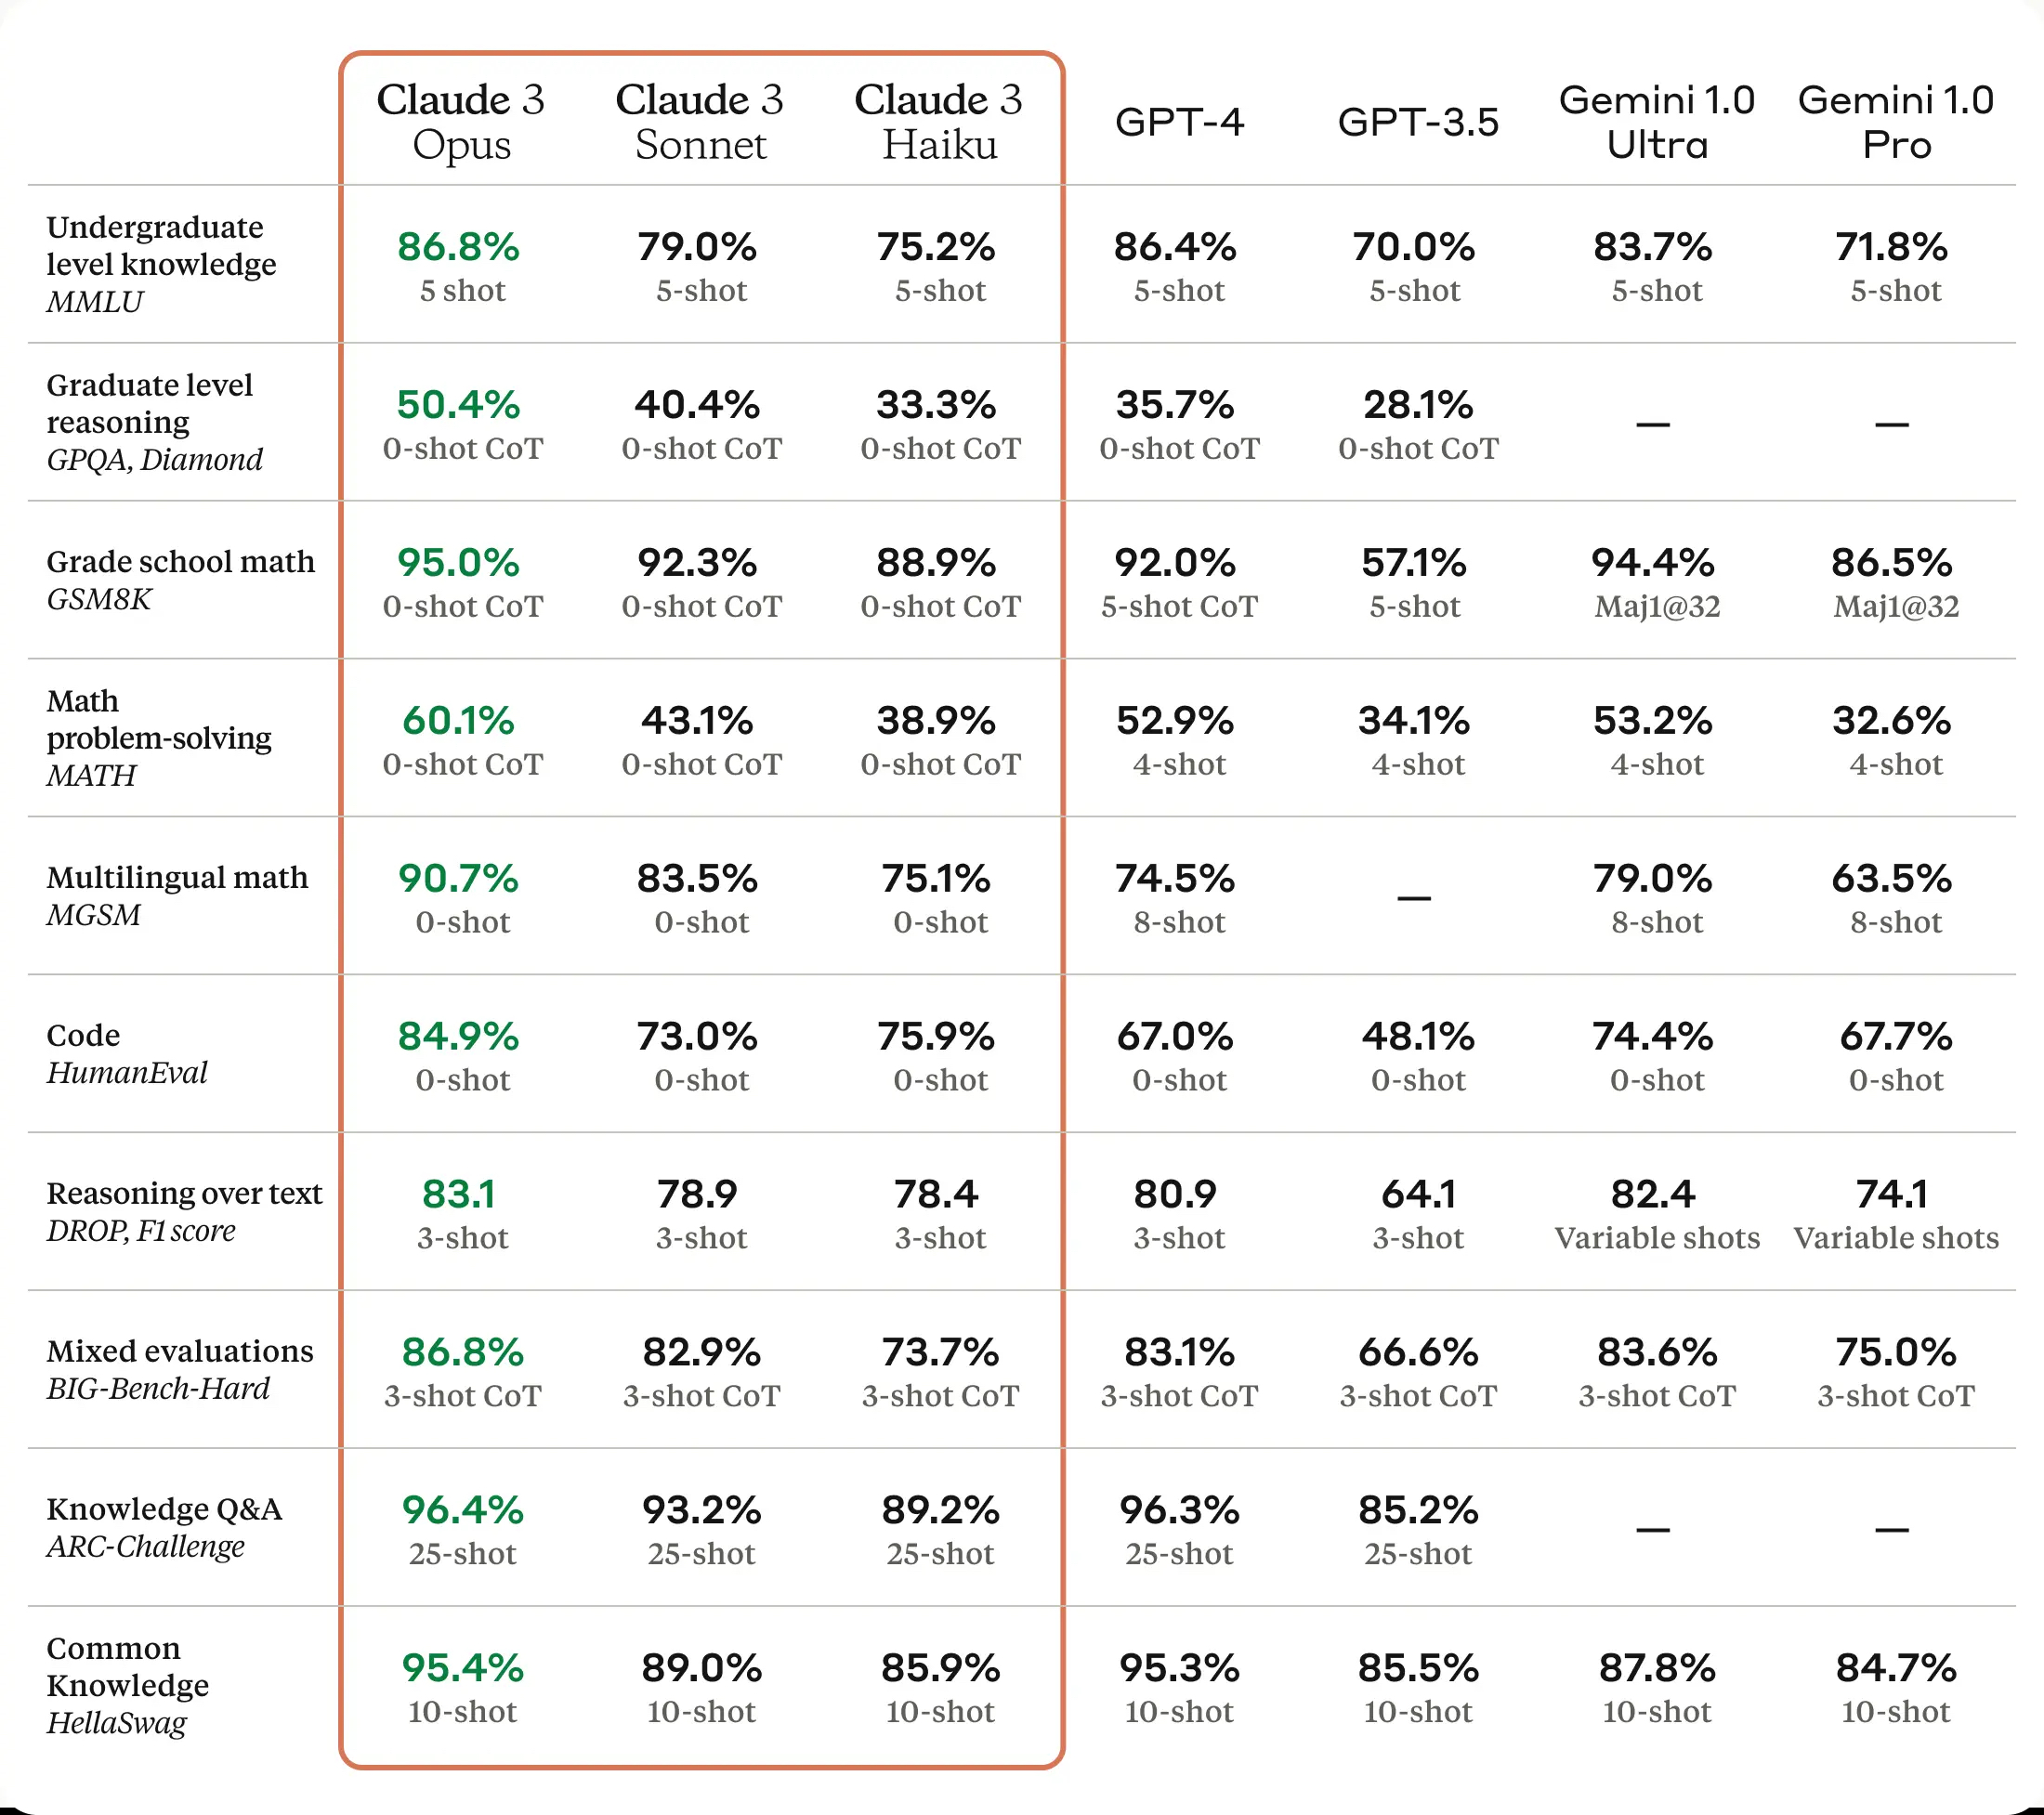

In [8]:
Image('claude_results.jpeg', width=800)

In [9]:
# load image and convert to base64
import base64
from PIL import Image
from io import BytesIO

image_data = base64.b64encode(open('claude_results.jpeg', 'rb').read()).decode('utf-8')

In [10]:
type(image_data)

str

In [11]:
image_data[:100]

'/9j/4AAQSkZJRgABAgEASABIAAD/4QDKRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAA'

# Describe an Image

In [12]:
message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/jpeg",
                        "data": image_data,
                    },
                },
                {
                    "type": "text",
                    "text": "Describe this image."
                }
            ],
        }
    ],
)
print(message)

Message(id='msg_013Xt1jmsqVjsECdka5qCK1G', content=[ContentBlock(text='This image shows a comparison table of various metrics across different AI language models, including Claude 3 (in Opus, Sonnet and Haiku variants), GPT-4, GPT-3.5, and two versions of Gemini.\n\nThe metrics compared include:\n- Undergraduate level knowledge (MMLU)\n- Graduate level reasoning (GPQA, Diamond)\n- Grade school math (GSM8K)\n- Math problem-solving (MATH)\n- Multilingual math (MGSM)\n- Code generation (HumanEval)\n- Reasoning over text (DROP, F1 score)\n- Mixed evaluations (BIG-Bench-Hard)\n- Knowledge Q&A (ARC-Challenge)\n- Common Knowledge (HellaSwag)\n\nFor each metric, the scores are provided along with the number of "shots" used in the evaluation (e.g. 0-shot, 5-shot, 10-shot etc.). The scores are given as percentages, except for the DROP reasoning metric which uses an F1 score.\n\nOverall, the table allows comparing the performance of these different AI models across a range of knowledge domains an

In [13]:
display(Markdown(message.content[0].text))

This image shows a comparison table of various metrics across different AI language models, including Claude 3 (in Opus, Sonnet and Haiku variants), GPT-4, GPT-3.5, and two versions of Gemini.

The metrics compared include:
- Undergraduate level knowledge (MMLU)
- Graduate level reasoning (GPQA, Diamond)
- Grade school math (GSM8K)
- Math problem-solving (MATH)
- Multilingual math (MGSM)
- Code generation (HumanEval)
- Reasoning over text (DROP, F1 score)
- Mixed evaluations (BIG-Bench-Hard)
- Knowledge Q&A (ARC-Challenge)
- Common Knowledge (HellaSwag)

For each metric, the scores are provided along with the number of "shots" used in the evaluation (e.g. 0-shot, 5-shot, 10-shot etc.). The scores are given as percentages, except for the DROP reasoning metric which uses an F1 score.

Overall, the table allows comparing the performance of these different AI models across a range of knowledge domains and reasoning tasks. The color coding appears to highlight the best performing model for each metric.

# Generate Code

In [14]:
message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/jpeg",
                        "data": image_data,
                    },
                },
                {
                    "type": "text",
                    "text": "Write python code to create a bar plot from the image table. Only Claude columns, dont include other models. x label is all the metrics, y label is the values."
                }
            ],
        }
    ],
)
print(message)

Message(id='msg_01THwqDdZn2oWfVF2XNu45w3', content=[ContentBlock(text="Here's the Python code to create a bar plot from the image table, including only the Claude columns:\n\n```python\nimport matplotlib.pyplot as plt\n\nmetrics = ['Undergraduate level knowledge MMLU',\n           'Graduate level reasoning GFQA, Diamond',\n           'Grade school math GSMSB',\n           'Math problem-solving MATH',\n           'Multilingual math MGSM',\n           'Code HumanEval',\n           'Reasoning over text DROP, F1 score',\n           'Mixed evaluations BIG-Bench-Hard',\n           'Knowledge Q&A ARC-Challenge',\n           'Common Knowledge HellaSwag']\n\nclaude_3_opus = [86.8, 50.4, 95.0, 60.1, 90.7, 84.9, 83.1, 86.8, 96.4, 95.4]\nclaude_3_sonnet = [79.0, 40.4, 92.3, 43.1, 83.5, 73.0, 78.9, 82.9, 93.2, 89.0]\nclaude_3_haiku = [75.2, 33.3, 88.9, 38.9, 75.1, 75.9, 78.4, 73.7, 89.2, 85.9]\n\nx = range(len(metrics))\nwidth = 0.25\n\nfig, ax = plt.subplots(figsize=(12, 8))\n\nax.bar(x, claude_3_

In [15]:
display(Markdown(message.content[0].text))

Here's the Python code to create a bar plot from the image table, including only the Claude columns:

```python
import matplotlib.pyplot as plt

metrics = ['Undergraduate level knowledge MMLU',
           'Graduate level reasoning GFQA, Diamond',
           'Grade school math GSMSB',
           'Math problem-solving MATH',
           'Multilingual math MGSM',
           'Code HumanEval',
           'Reasoning over text DROP, F1 score',
           'Mixed evaluations BIG-Bench-Hard',
           'Knowledge Q&A ARC-Challenge',
           'Common Knowledge HellaSwag']

claude_3_opus = [86.8, 50.4, 95.0, 60.1, 90.7, 84.9, 83.1, 86.8, 96.4, 95.4]
claude_3_sonnet = [79.0, 40.4, 92.3, 43.1, 83.5, 73.0, 78.9, 82.9, 93.2, 89.0]
claude_3_haiku = [75.2, 33.3, 88.9, 38.9, 75.1, 75.9, 78.4, 73.7, 89.2, 85.9]

x = range(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x, claude_3_opus, width, label='Claude 3 Opus')
ax.bar([i + width for i in x], claude_3_sonnet, width, label='Claude 3 Sonnet')
ax.bar([i + 2*width for i in x], claude_3_haiku, width, label='Claude 3 Haiku')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()
```

This code does the following:

1. It imports the necessary matplotlib.pyplot module.

2. It defines the metrics as a list of strings.

3. It extracts the values for each Claude model (Opus, Sonnet, and Haiku) into separate lists.

4. It sets up the x-coordinates and width for the bars.

5. It creates a figure and an axis using `plt.subplots()`.

6. It creates the bars for each Claude model using `ax.bar()`, with appropriate offsets for the x-coordinates.

7. It sets the x-label and y-label using `ax.set_xlabel()` and `ax.set_ylabel()`, respectively.

8. It sets the x-tick positions and labels using `ax.set_xticks()` and `ax.set_xticklabels()`, with rotation and horizontal alignment for better readability.

9. It adds a legend using `ax.legend()`.

10. It adjusts the layout using `plt.tight_layout()` to ensure the labels and titles fit nicely.

11. Finally, it displays the plot using `plt.show()`.

When you run this code, it will generate a bar plot comparing the performance of the Claude models (Opus, Sonnet, and Haiku) across various metrics.

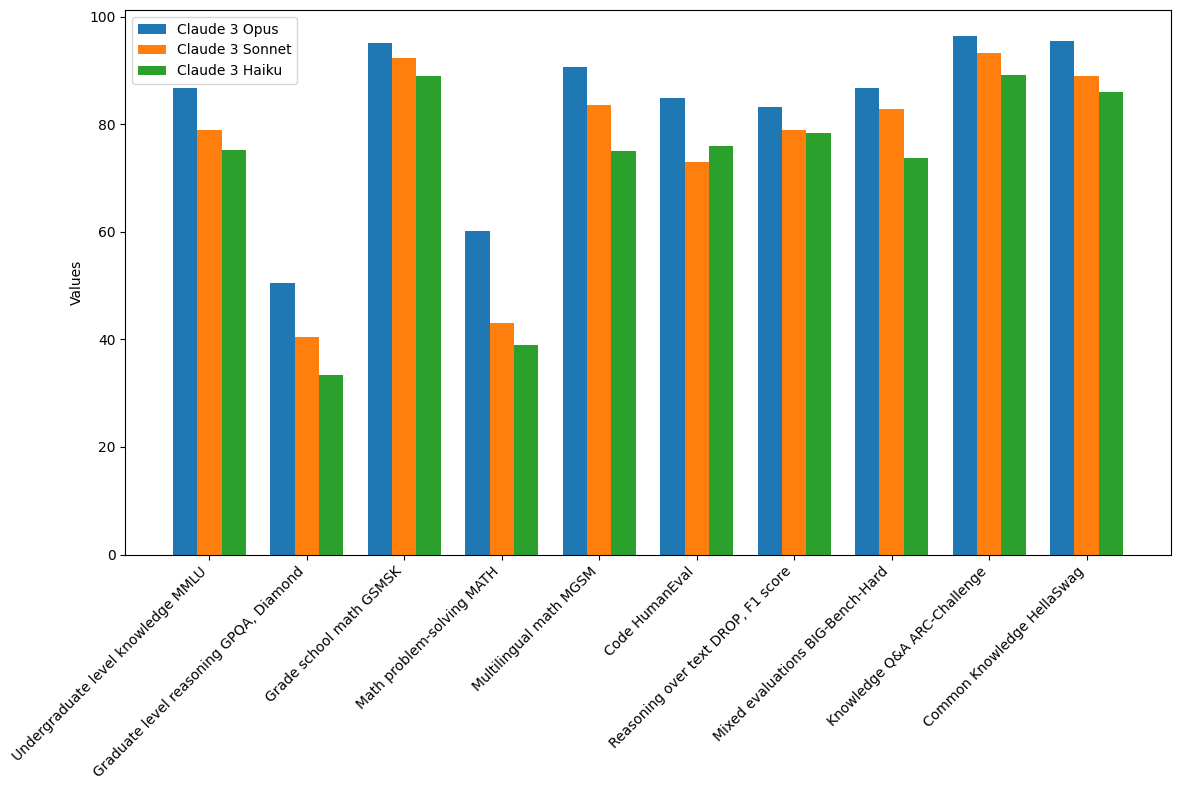

In [16]:
import matplotlib.pyplot as plt

metrics = ['Undergraduate level knowledge MMLU',
           'Graduate level reasoning GPQA, Diamond',
           'Grade school math GSMSK',
           'Math problem-solving MATH',
           'Multilingual math MGSM',
           'Code HumanEval',
           'Reasoning over text DROP, F1 score',
           'Mixed evaluations BIG-Bench-Hard',
           'Knowledge Q&A ARC-Challenge',
           'Common Knowledge HellaSwag']

claude_3_opus = [86.8, 50.4, 95.0, 60.1, 90.7, 84.9, 83.1, 86.8, 96.4, 95.4]
claude_3_sonnet = [79.0, 40.4, 92.3, 43.1, 83.5, 73.0, 78.9, 82.9, 93.2, 89.0]
claude_3_haiku = [75.2, 33.3, 88.9, 38.9, 75.1, 75.9, 78.4, 73.7, 89.2, 85.9]

x = range(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x, claude_3_opus, width, label='Claude 3 Opus')
ax.bar([i + width for i in x], claude_3_sonnet, width, label='Claude 3 Sonnet')
ax.bar([i + width*2 for i in x], claude_3_haiku, width, label='Claude 3 Haiku')

ax.set_ylabel('Values')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

# Recipe Generation

In [17]:
recipe_data = base64.b64encode(open('recipe.jpg', 'rb').read()).decode('utf-8')

In [18]:
from IPython.display import Image

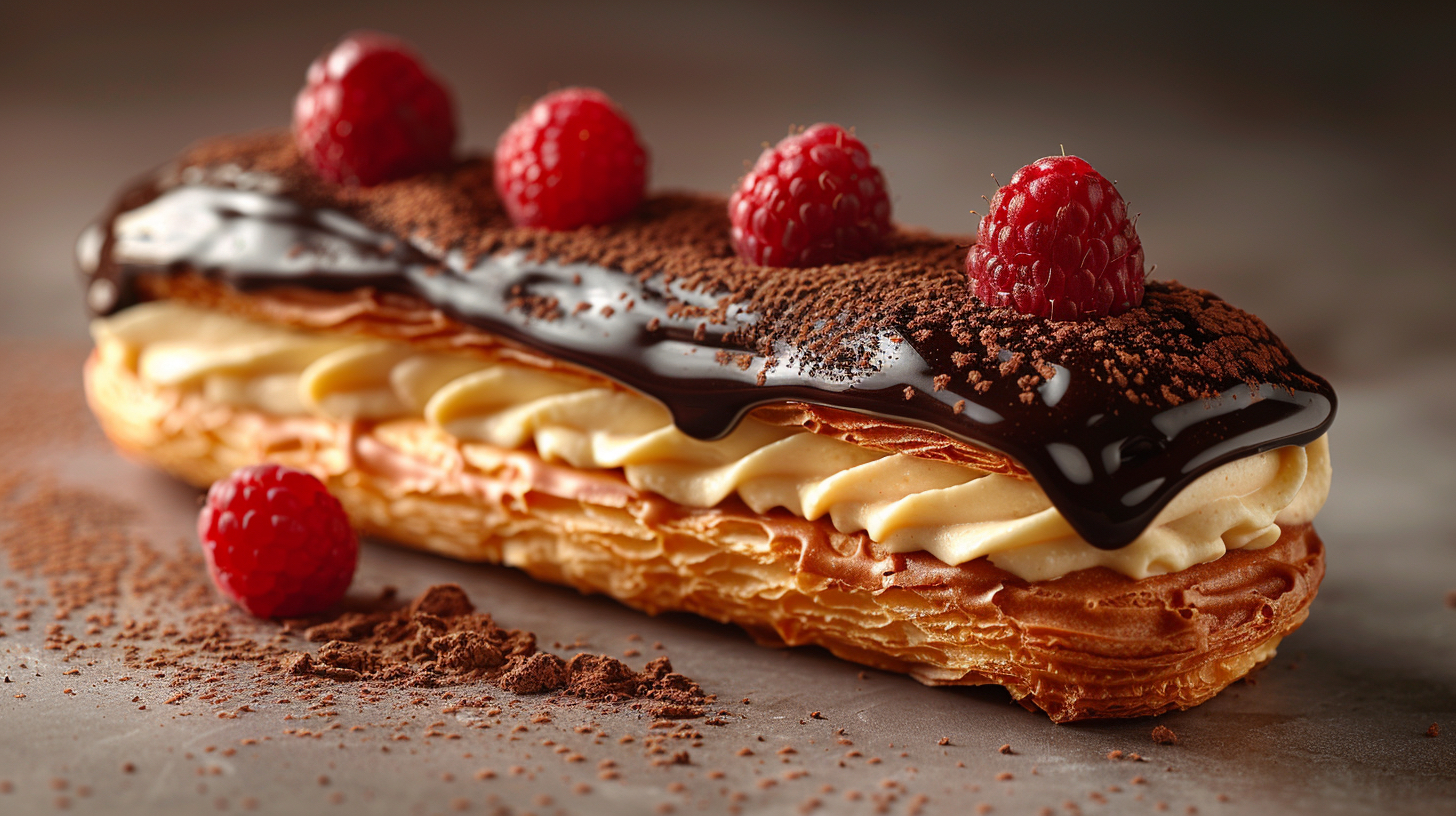

In [19]:
#display the image
Image('recipe.jpg', width=800)

Prompt I used to generate the image is 'A single perfect éclair, dark chocolate glaze, a single raspberry on top, cracked surface revealing vanilla custard'

In [20]:
message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/jpeg",
                        "data": recipe_data,
                    },
                },
                {
                    "type": "text",
                    "text": "Generate recipe for the given image."
                }
            ],
        }
    ],
)
print(message)

Message(id='msg_01L7JH75i2MPegcQa4b597DS', content=[ContentBlock(text='This image shows an appetizing raspberry chocolate eclair or cream puff dessert. The eclair pastry is golden brown and flaky looking, filled with a luscious vanilla cream filling, and topped with a rich chocolate ganache glaze and fresh raspberries dusted with cocoa powder.\n\nTo make raspberry chocolate eclairs, you would need to:\n\n1. Prepare choux pastry dough, pipe it into eclair shapes, and bake until puffed and golden.\n\n2. Make a vanilla pastry cream filling, let it chill, then pipe it into the cooled eclair shells. \n\n3. Prepare a shiny chocolate ganache glaze and dip or spread it on top of the filled eclairs.\n\n4. Top with fresh raspberries and dust with cocoa powder for the finishing touch. \n\n5. Chill the assembled eclairs for a couple hours to allow flavors to meld before serving.\n\nThe combination of crisp pastry, silky cream, bittersweet chocolate and tart-sweet raspberries makes for an irresisti

In [21]:
display(Markdown(message.content[0].text))

This image shows an appetizing raspberry chocolate eclair or cream puff dessert. The eclair pastry is golden brown and flaky looking, filled with a luscious vanilla cream filling, and topped with a rich chocolate ganache glaze and fresh raspberries dusted with cocoa powder.

To make raspberry chocolate eclairs, you would need to:

1. Prepare choux pastry dough, pipe it into eclair shapes, and bake until puffed and golden.

2. Make a vanilla pastry cream filling, let it chill, then pipe it into the cooled eclair shells. 

3. Prepare a shiny chocolate ganache glaze and dip or spread it on top of the filled eclairs.

4. Top with fresh raspberries and dust with cocoa powder for the finishing touch. 

5. Chill the assembled eclairs for a couple hours to allow flavors to meld before serving.

The combination of crisp pastry, silky cream, bittersweet chocolate and tart-sweet raspberries makes for an irresistible treat that is sure to impress. While eclairs take some time and technique, the end result of this classic French patisserie is well worth the effort for a special occasion dessert.

# Image with system prompt

In [22]:
message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=1024,
    system="You are an expert chef, who can generate recipes from images in french.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/jpeg",
                        "data": recipe_data,
                    },
                },
                {
                    "type": "text",
                    "text": "Generate recipe for the given image."
                }
            ],
        }
    ],
)
print(message)

Message(id='msg_01QGkczZma6tD84ZQoNccyzW', content=[ContentBlock(text="Voici une recette pour un éclair au chocolat et aux framboises, inspirée de l'image :\n\nPâte à choux :\n- 125 ml d'eau\n- 50 g de beurre\n- 65 g de farine \n- 2 œufs\n- 1 pincée de sel\n\nCrème pâtissière à la vanille :\n- 250 ml de lait\n- 50 g de sucre\n- 30 g de farine\n- 2 jaunes d'œufs \n- 1 gousse de vanille\n\nGanache au chocolat :\n- 100 g de chocolat noir\n- 100 ml de crème fraîche liquide\n\nDécoration :\n- Cacao en poudre\n- Framboises fraîches\n\nInstructions :\n\n1. Préparez la pâte à choux en portant à ébullition l'eau, le beurre et le sel. Hors du feu, incorporez la farine d'un coup puis remettez sur feu doux en mélangeant jusqu'à ce que la pâte se décolle. Laissez tiédir puis incorporez les œufs un par un. Pochez sur une plaque et faites cuire 30 min à 180°C.\n\n2. Pour la crème, portez le lait et la vanille à ébullition. À part, mélangez sucre, farine et jaunes d'œufs. Versez le lait dessus en méla

In [23]:
display(Markdown(message.content[0].text))

Voici une recette pour un éclair au chocolat et aux framboises, inspirée de l'image :

Pâte à choux :
- 125 ml d'eau
- 50 g de beurre
- 65 g de farine 
- 2 œufs
- 1 pincée de sel

Crème pâtissière à la vanille :
- 250 ml de lait
- 50 g de sucre
- 30 g de farine
- 2 jaunes d'œufs 
- 1 gousse de vanille

Ganache au chocolat :
- 100 g de chocolat noir
- 100 ml de crème fraîche liquide

Décoration :
- Cacao en poudre
- Framboises fraîches

Instructions :

1. Préparez la pâte à choux en portant à ébullition l'eau, le beurre et le sel. Hors du feu, incorporez la farine d'un coup puis remettez sur feu doux en mélangeant jusqu'à ce que la pâte se décolle. Laissez tiédir puis incorporez les œufs un par un. Pochez sur une plaque et faites cuire 30 min à 180°C.

2. Pour la crème, portez le lait et la vanille à ébullition. À part, mélangez sucre, farine et jaunes d'œufs. Versez le lait dessus en mélangeant, puis remettez sur feu doux jusqu'à épaississement. Laissez refroidir.

3. Préparez la ganache en faisant fondre le chocolat avec la crème chauffée.

4. Fourrez les éclairs refroidis de crème pâtissière, glacez-les de ganache, saupoudrez de cacao et décorez de framboises fraîches. 

Dégustez ces délicieux éclairs faits maison, alliant le croquant de la pâte, la douceur vanillée de la crème et l'intense chocolat, rehaussés de framboises acidulées.

# Multiple Images: Getting Feedback on What Shoe to Wear for a Blue Suit

In [24]:
blue_suit = base64.b64encode(open('suit.jpeg', 'rb').read()).decode('utf-8')
black_shoes = base64.b64encode(open('black_shoe.jpeg', 'rb').read()).decode('utf-8')
brown_shoes = base64.b64encode(open('brown_shoe.jpeg', 'rb').read()).decode('utf-8')

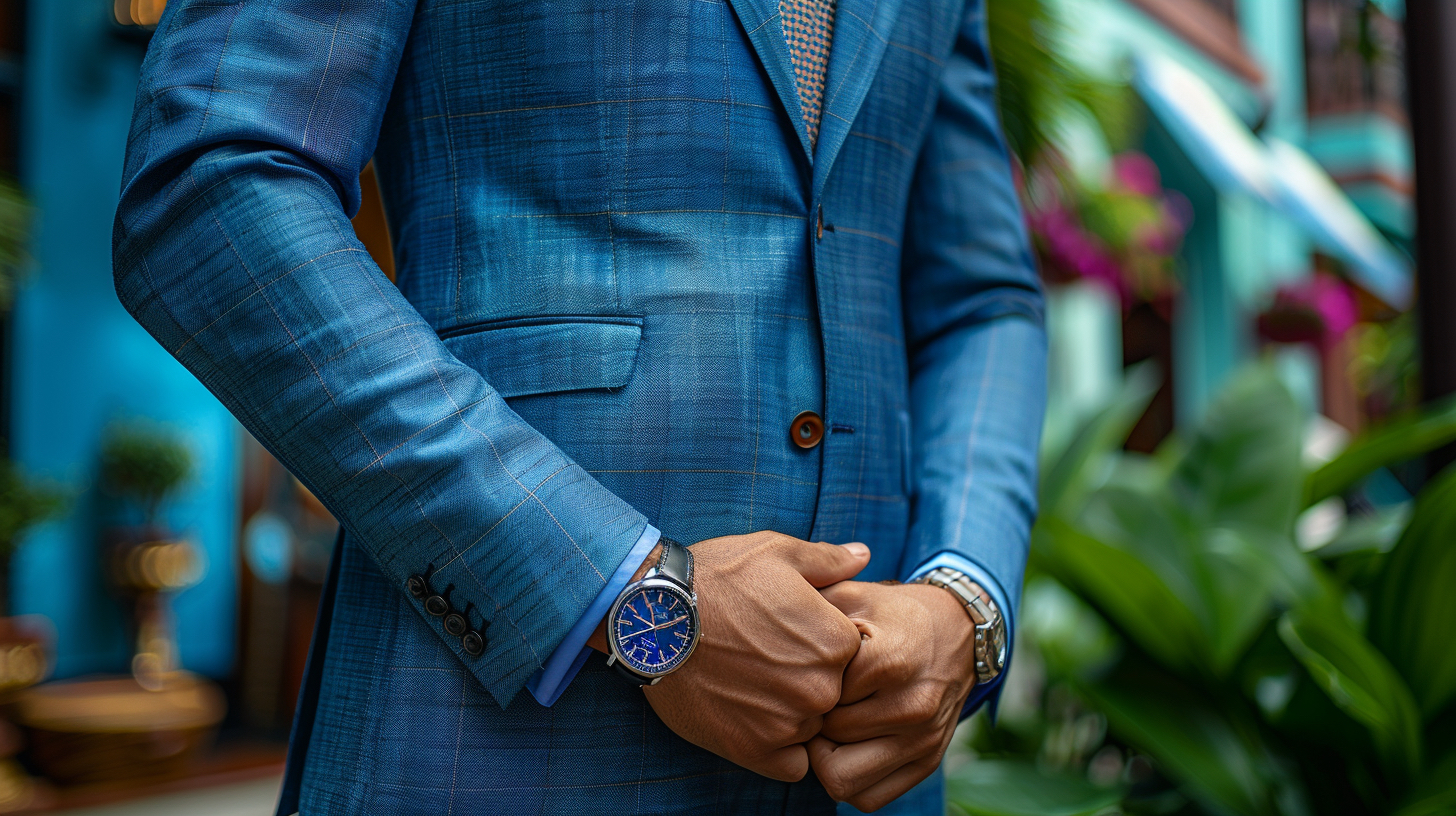

In [25]:
Image('suit.jpeg', width=500)


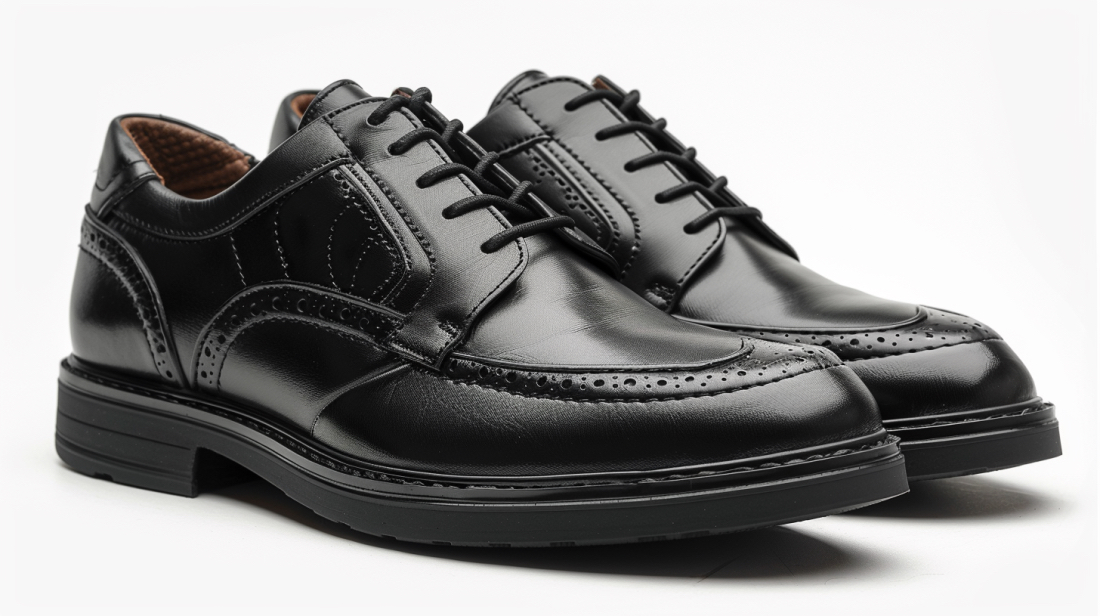

In [26]:
Image('black_shoe.jpeg', width=500)

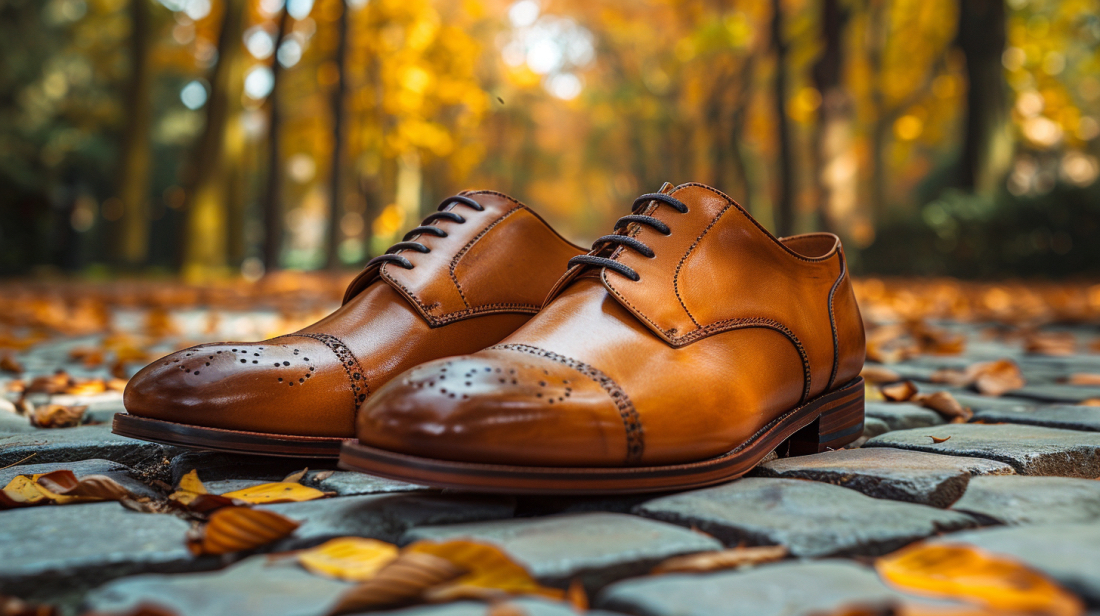

In [27]:
Image('brown_shoe.jpeg', width=500)

In [28]:
suit_data = base64.b64encode(open('suit.jpeg', 'rb').read()).decode('utf-8')
black_shoe_data = base64.b64encode(open('black_shoe.jpeg', 'rb').read()).decode('utf-8')
brown_shoe_data = base64.b64encode(open('brown_shoe.jpeg', 'rb').read()).decode('utf-8')

In [29]:
message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=1024,
    system="You are a fashion expert who has excellent knowledge of color combinations and can recommend the best color shoe for the given suit.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Suit:"
                },
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/jpeg",
                        "data": suit_data,
                    },
                },
                {
                    "type": "text",
                    "text": "Shoe 1:"
                },
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/jpeg",
                        "data": black_shoe_data,
                    },
                },
                {
                    "type": "text",
                    "text": "Shoe 2:"
                },
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/jpeg",
                        "data": brown_shoe_data,
                    },
                },
                {
                    "type": "text",
                    "text": "For my suit, Look into  my suit color, and recommend what color shoe should I wear? Black or brown? Give reasons."
                
                }
               
            ],
        }
    ],
)

In [30]:
display(Markdown(message.content[0].text))

Based on the blue plaid suit shown in the image, I would recommend pairing it with the brown leather dress shoes (Shoe 2) rather than the black ones (Shoe 1). Here are a few reasons why:

1. Brown shoes complement blue suits very well, creating a harmonious and stylish color combination. The warm tones of the brown leather pair nicely with the cool blue hues of the suit fabric.

2. Wearing brown shoes with a blue suit is a classic and versatile look that can work for both business and more casual occasions. It's not quite as formal as a black shoe, but still polished and put-together.

3. The rich, burnished leather of the brown shoes in the photo would add some nice visual texture and depth to offset the plaid pattern of the suit. The broguing details on the shoes also provide an extra touch of style.

4. Black shoes, while always appropriate with a navy solid suit, can sometimes look a bit stark or severe with lighter shades of blue or bolder patterns like the plaid shown here. The brown option allows the suit to remain the focal point.

So in summary, while you can't go wrong with either, I'd suggest the brown dress shoes as the optimal pairing to elevate this blue plaid suit. The combination strikes the right balance of dapper and distinctive.